In [59]:
import pandas as pd
import numpy as np
from keras.models import Sequential
from keras.layers import Dense
from keras.utils import to_categorical
from keras.callbacks import EarlyStopping

import matplotlib
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split


In [60]:
%matplotlib inline

In [5]:
#load the dataset
df = pd.read_csv("HR_comma_sep.csv")

In [6]:
#preview
df.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,sales,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


In [7]:
df.sales.value_counts()

sales          4140
technical      2720
support        2229
IT             1227
product_mng     902
marketing       858
RandD           787
accounting      767
hr              739
management      630
Name: sales, dtype: int64

In [8]:
df.rename(columns={'sales':'department'},inplace=True)

In [11]:
#let's convert the two categorical variables 'department' and 'salary' into dummy-variables for modelling

In [13]:
df = pd.get_dummies(df,columns=['department','salary'])

In [14]:
x,y = df.drop('left',axis=1).values, df.left.values

In [24]:
# let's do a training-test split for validation later on

x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.3, random_state=2017)

In [33]:
# let's convert our output variable into categorical format for keras

num_classes = np.max(y_train)+1
y_train = to_categorical(y_train,num_classes)
y_test = to_categorical(y_test,num_classes)

In [37]:
x_train.shape

(10499, 20)

In [38]:
n_cols = x_train.shape[1]

In [49]:
#set-up early-stopping monitor
early_stopping_monitor = EarlyStopping(patience=5)

# Baseline Model

Train on 8399 samples, validate on 2100 samples
Epoch 1/20
8399/8399 [==============================] - 1s - loss: 0.6143 - acc: 0.7333 - val_loss: 0.4794 - val_acc: 0.7719
Epoch 2/20
8399/8399 [==============================] - 0s - loss: 0.4906 - acc: 0.7702 - val_loss: 0.4352 - val_acc: 0.7710
Epoch 3/20
8399/8399 [==============================] - 0s - loss: 0.4535 - acc: 0.7787 - val_loss: 0.4335 - val_acc: 0.8067
Epoch 4/20
8399/8399 [==============================] - 0s - loss: 0.4346 - acc: 0.7885 - val_loss: 0.4333 - val_acc: 0.8176
Epoch 5/20
8399/8399 [==============================] - 0s - loss: 0.4187 - acc: 0.7874 - val_loss: 0.4008 - val_acc: 0.8276
Epoch 6/20
8399/8399 [==============================] - 0s - loss: 0.4024 - acc: 0.8039 - val_loss: 0.3710 - val_acc: 0.7957
Epoch 7/20
8399/8399 [==============================] - 0s - loss: 0.3772 - acc: 0.8172 - val_loss: 0.3661 - val_acc: 0.8424
Epoch 8/20
8399/8399 [==============================] - 0s - loss: 0.3729 - a

[0.3035123314857483, 0.88066666671964855]

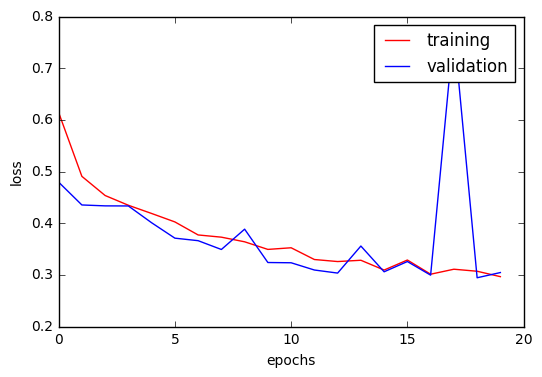

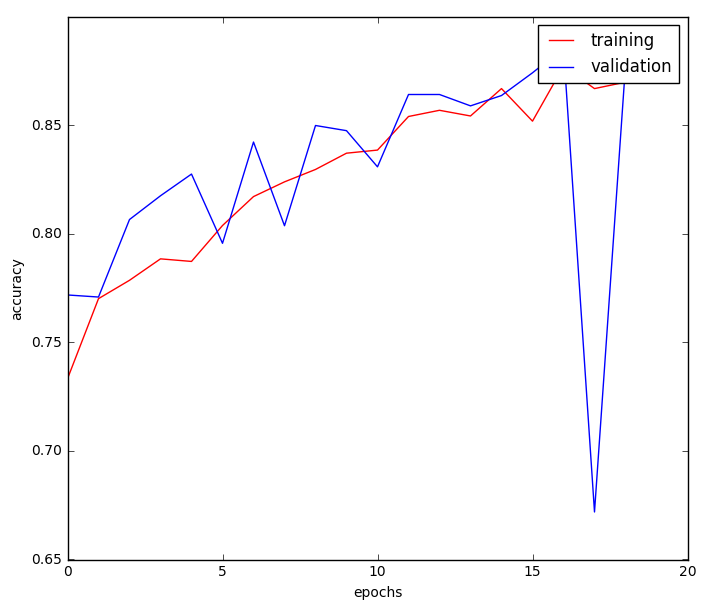

In [110]:
# configure our neural-net

model = Sequential()
model.add(Dense(50,activation='relu',input_shape=(n_cols,)))
model.add(Dense(2,activation='softmax'))

#compile
model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])

#fit
history = model.fit(x_train,y_train,epochs=20,verbose=1,validation_split=0.2)

model.summary()

#plot training and validation los
plt.plot(history.history['loss'],'r',label='training')
plt.plot(history.history['val_loss'],'b',label='validation')
plt.xlabel('epochs')
plt.ylabel('loss')
plt.legend()

#plot training and validation accuracy
plt.figure(figsize=(8,7))
plt.plot(history.history['acc'],'r',label='training')
plt.plot(history.history['val_acc'],'b',label='validation')
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.legend()


# so we see that our baseline model has quite good accuracy just after 20 epochs

#let's evaluate our model to predict on our hold-out data

model.evaluate(x_test,y_test)


In [104]:
# Let's increase number of nodes in the hidden layer and repeat 

# Model-2 : Increasing number of nodes in hidden layer

Train on 8399 samples, validate on 2100 samples
Epoch 1/20
8399/8399 [==============================] - 0s - loss: 0.6829 - acc: 0.7482 - val_loss: 0.4807 - val_acc: 0.7719
Epoch 2/20
8399/8399 [==============================] - 0s - loss: 0.5078 - acc: 0.7616 - val_loss: 0.4543 - val_acc: 0.7790
Epoch 3/20
8399/8399 [==============================] - 0s - loss: 0.4623 - acc: 0.7713 - val_loss: 0.4372 - val_acc: 0.7871
Epoch 4/20
8399/8399 [==============================] - 0s - loss: 0.4442 - acc: 0.7763 - val_loss: 0.3894 - val_acc: 0.7881
Epoch 5/20
8399/8399 [==============================] - 0s - loss: 0.4251 - acc: 0.7896 - val_loss: 0.4300 - val_acc: 0.8214
Epoch 6/20
8399/8399 [==============================] - 0s - loss: 0.3998 - acc: 0.7953 - val_loss: 0.3649 - val_acc: 0.8105
Epoch 7/20
8399/8399 [==============================] - 0s - loss: 0.3709 - acc: 0.8168 - val_loss: 0.3524 - val_acc: 0.8262
Epoch 8/20
8399/8399 [==============================] - 0s - loss: 0.3714 - a

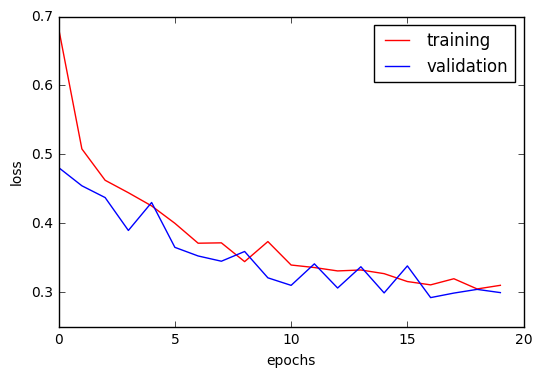

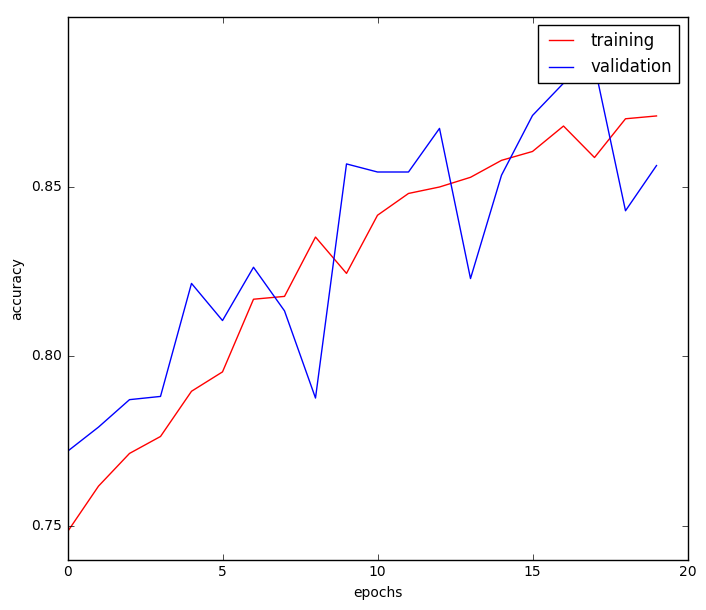

In [109]:
# configure our neural-net

model = Sequential()
model.add(Dense(100,activation='relu',input_shape=(n_cols,))) #changed number of hidden layers from 50 to 100
model.add(Dense(2,activation='softmax'))

#compile
model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])

#fit
history = model.fit(x_train,y_train,epochs=20,verbose=1,validation_split=0.2)

model.summary()

#plot training and validation los
plt.plot(history.history['loss'],'r',label='training')
plt.plot(history.history['val_loss'],'b',label='validation')
plt.xlabel('epochs')
plt.ylabel('loss')
plt.legend()

#plot training and validation accuracy
plt.figure(figsize=(8,7))
plt.plot(history.history['acc'],'r',label='training')
plt.plot(history.history['val_acc'],'b',label='validation')
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.legend()

# so we see that our baseline model has quite good accuracy just after 20 epochs

#let's evaluate our model to predict on our hold-out data

print "Model Evaluation on test dataset [loss,accuracy] ",model.evaluate(x_test,y_test)


In [112]:
# we see that increasing the number of nodes in the hidden layer didn't help, let's move on to model-3

# Model 3: Adding more hidden layers

Train on 8399 samples, validate on 2100 samples
Epoch 1/20
8399/8399 [==============================] - 1s - loss: 0.5835 - acc: 0.7518 - val_loss: 0.5381 - val_acc: 0.7724
Epoch 2/20
8399/8399 [==============================] - 0s - loss: 0.5315 - acc: 0.7597 - val_loss: 0.4792 - val_acc: 0.7724
Epoch 3/20
8399/8399 [==============================] - 0s - loss: 0.4862 - acc: 0.7693 - val_loss: 0.4349 - val_acc: 0.7876
Epoch 4/20
8399/8399 [==============================] - 0s - loss: 0.4532 - acc: 0.7775 - val_loss: 0.4440 - val_acc: 0.7719
Epoch 5/20
8399/8399 [==============================] - 0s - loss: 0.4348 - acc: 0.7883 - val_loss: 0.4842 - val_acc: 0.7714
Epoch 6/20
8399/8399 [==============================] - 0s - loss: 0.4207 - acc: 0.7976 - val_loss: 0.4011 - val_acc: 0.8329
Epoch 7/20
8399/8399 [==============================] - 0s - loss: 0.3953 - acc: 0.8106 - val_loss: 0.4270 - val_acc: 0.8329
Epoch 8/20
8399/8399 [==============================] - 0s - loss: 0.3777 - a

[0.28207095686594646, 0.88711111100514728]

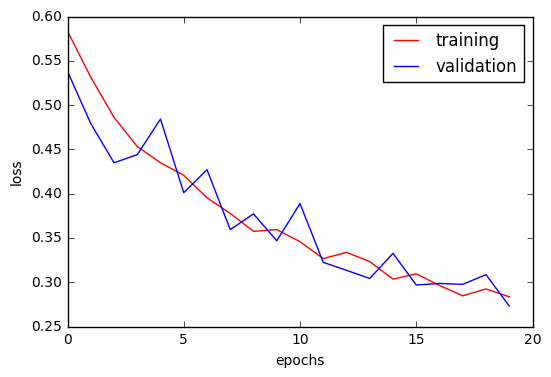

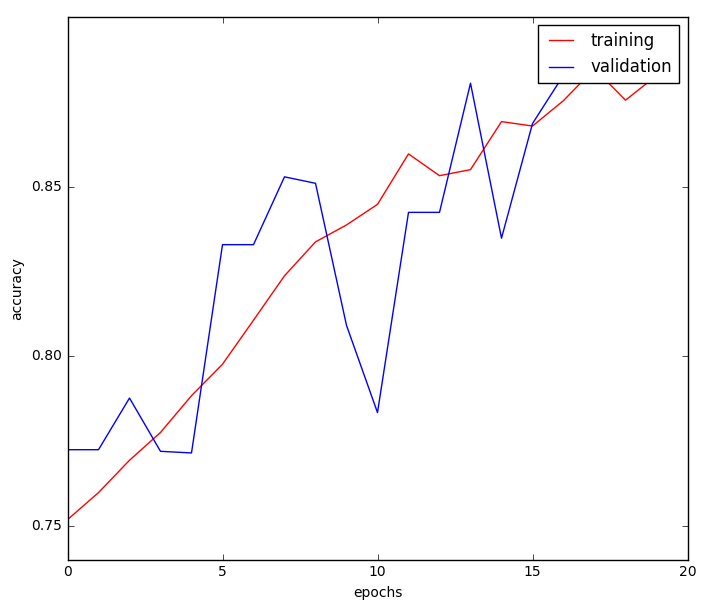

In [138]:
# configure our neural-net

model = Sequential()
model.add(Dense(50,activation='relu',input_shape=(n_cols,))) 
model.add(Dense(50,activation='relu')) 
model.add(Dense(2,activation='softmax'))

#compile
model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])

#fit
history = model.fit(x_train,y_train,epochs=20,verbose=1,validation_split=0.2)

model.summary()

#plot training and validation los
plt.plot(history.history['loss'],'r',label='training')
plt.plot(history.history['val_loss'],'b',label='validation')
plt.xlabel('epochs')
plt.ylabel('loss')
plt.legend()

#plot training and validation accuracy
plt.figure(figsize=(8,7))
plt.plot(history.history['acc'],'r',label='training')
plt.plot(history.history['val_acc'],'b',label='validation')
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.legend()

# so we see that our baseline model has quite good accuracy just after 20 epochs

#let's evaluate our model to predict on our hold-out data

print "Model Evaluation on test dataset [loss,accuracy] ",
model.evaluate(x_test,y_test)


In [123]:
#increasing the number of layers certainly helped which leads us to our next model where make the model deeper

# Model 4 : Making it more deep model

Train on 8399 samples, validate on 2100 samples
Epoch 1/50
8399/8399 [==============================] - 1s - loss: 0.6810 - acc: 0.7106 - val_loss: 0.5164 - val_acc: 0.7724
Epoch 2/50
8399/8399 [==============================] - 0s - loss: 0.6065 - acc: 0.7388 - val_loss: 0.4826 - val_acc: 0.7710
Epoch 3/50
8399/8399 [==============================] - 0s - loss: 0.5443 - acc: 0.7549 - val_loss: 0.5502 - val_acc: 0.7419
Epoch 4/50
8399/8399 [==============================] - 0s - loss: 0.5156 - acc: 0.7551 - val_loss: 0.4432 - val_acc: 0.7652
Epoch 5/50
8399/8399 [==============================] - 0s - loss: 0.4691 - acc: 0.7733 - val_loss: 0.4562 - val_acc: 0.7724
Epoch 6/50
8399/8399 [==============================] - 0s - loss: 0.4116 - acc: 0.7943 - val_loss: 0.5180 - val_acc: 0.7719
Epoch 7/50
8399/8399 [==============================] - 0s - loss: 0.3866 - acc: 0.8066 - val_loss: 0.3790 - val_acc: 0.8348
Epoch 8/50
8399/8399 [==============================] - 0s - loss: 0.3748 - a

[0.34938631720013091, 0.85999999999999999]

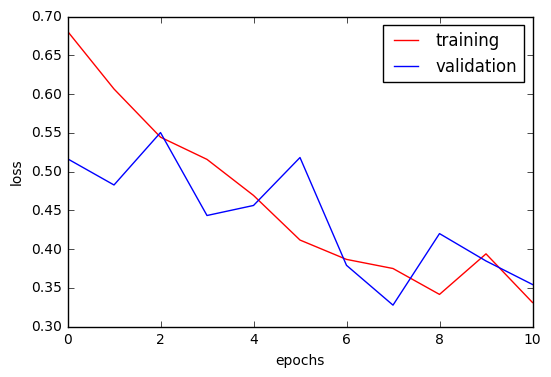

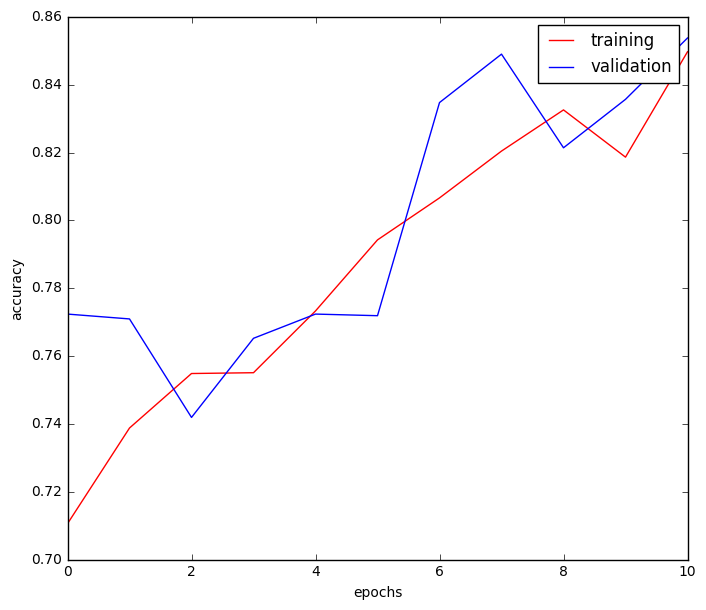

In [139]:
# configure our neural-net

model = Sequential()
model.add(Dense(50,activation='relu',input_shape=(n_cols,))) 
model.add(Dense(50,activation='relu')) 
# model.add(Dense(50,activation='relu'))
model.add(Dense(2,activation='softmax'))

#compile
model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])

#fit
history = model.fit(x_train,y_train,epochs=50,verbose=1,validation_split=0.2,callbacks=[early_stopping_monitor])

model.summary()

#plot training and validation los
plt.plot(history.history['loss'],'r',label='training')
plt.plot(history.history['val_loss'],'b',label='validation')
plt.xlabel('epochs')
plt.ylabel('loss')
plt.legend()

#plot training and validation accuracy
plt.figure(figsize=(8,7))
plt.plot(history.history['acc'],'r',label='training')
plt.plot(history.history['val_acc'],'b',label='validation')
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.legend()

# so we see that our baseline model has quite good accuracy just after 20 epochs

#let's evaluate our model to predict on our hold-out data

print "Model Evaluation on test dataset [loss,accuracy] ",
model.evaluate(x_test,y_test)
